In [15]:
import numpy as np               # bibliothèque qui ajoute les tables
import pandas as pd              # bibliothèque qui ajoute les tableaux (tableurs)
import matplotlib.pyplot as plt  # bibliothèque graphique pour tracer des courbes

In [16]:
# DATASETS
# https://www.kaggle.com/datasets/ravnitlotay/leagueoflegends-champions-game-champions-outcome/code
# STEP 1 : Identify how to extract data
# STEP 2 : Automate to apply on multiple dataset
#

In [2]:
# commandes magiques Jupyter pour voir les graphiques dans cette page :
%matplotlib inline                           
%config InlineBackend.figure_format = 'retina'

In [65]:
# Load Challenger Data
games = pd.read_csv("./Champions_games/Challenger/lol_Challenger_data.csv")
print(games.shape)
games.head()

(5960, 319)


,aatrox_blue,aatrox_red,ahri_blue,ahri_red,akali_blue,akali_red,akshan_blue,akshan_red,alistar_blue,alistar_red,...,zeri_red,ziggs_blue,ziggs_red,zilean_blue,zilean_red,zoe_blue,zoe_red,zyra_blue,zyra_red,blue_team_win
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [68]:
# The mean value of each champions represents the pick rate by challenger player
dc = games.describe()

pick_rate = dc.iloc[1].drop("blue_team_win")
print(pick_rate.sum())
print(len(pick_rate), "columns with 2 columns per champions")
new_columns = [s.split("_")[0] for s in pick_rate.index.values]
clean_pick_rate = pick_rate.groupby(new_columns).sum()
print(len(clean_pick_rate), "columns with cleaned data")
clean_pick_rate.sum()


#champion_pick = games.drop("blue_team_win", axis=1).apply(lambda x:x.sum()/5960,axis=0)
#champion_pick.sum()


10.0
318 columns with 2 columns per champions
159 columns with cleaned data


10.0

In [84]:
#Get champs winrates
blue_columns = [e for e in games.columns if "_blue" in e]
red_columns = [e for e in games.columns if "_red" in e]
champ_winrate = []
for blue_champ, red_champ in zip(blue_columns,red_columns):
    b_localgames = games[games[blue_champ] == 1]
    b_total = b_localgames.shape[0]
    r_localgames = games[games[red_champ] == 1]
    r_total = r_localgames.shape[0]
    champ_winrate.append((b_localgames["blue_team_win"].sum() + (r_total - r_localgames["blue_team_win"].sum()) ) / (b_total + r_total))


In [111]:
champ_win_rate = pd.DataFrame(champ_winrate,index=clean_pick_rate.index,columns=["Challenger_WinRate"])

<BarContainer object of 159 artists>

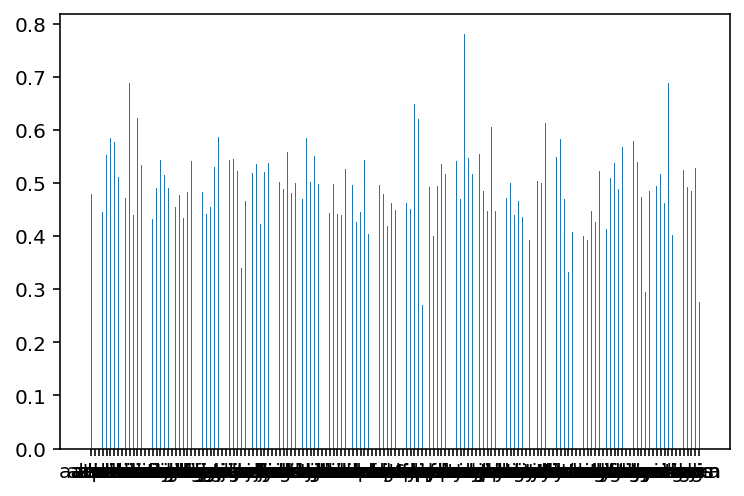

In [117]:
# Visualize win rates
plt.bar(champ_win_rate.index,champ_win_rate["Challenger_WinRate"],0.2)

In [149]:
# Automate process
def get_dataset_winrate(csv_path, *args):
    lgame = pd.read_csv(csv_path, *args)
    clean_game = lgame.drop("blue_team_win",axis=1)
    #columns = np.unique([s.split("_")[0] for s in clean_game.columns.values])
    
    #Get champs winrates
    blue_columns = [e for e in clean_game.columns if "_blue" in e]
    red_columns = [e for e in clean_game.columns if "_red" in e]
    champ_winrate = []
    for blue_champ, red_champ in zip(blue_columns,red_columns):
        b_localgames = lgame[lgame[blue_champ] == 1]
        b_total = b_localgames.shape[0]
        r_localgames = lgame[lgame[red_champ] == 1]
        r_total = r_localgames.shape[0]
        champ_winrate.append((b_localgames["blue_team_win"].sum() + (r_total - r_localgames["blue_team_win"].sum()) ) / (b_total + r_total))
    return champ_winrate


champ_win_rate["Grandmaster_WinRate"] = get_dataset_winrate("./Champions_games/GrandMaster/lol_GrandMaster_data.csv")
champ_win_rate["Master_WinRate"] = get_dataset_winrate("./Champions_games/Master/lol_Master_data.csv")


In [114]:
champ_win_rate.head()

,Challenger_WinRate,Grandmaster_WinRate,Master_WinRate
aatrox,0.479079,0.469713,0.478843
ahri,0.503462,0.513208,0.522539
akali,0.467780,0.526250,0.500000
akshan,0.445513,0.497613,0.518892
alistar,0.552632,0.516620,0.502012


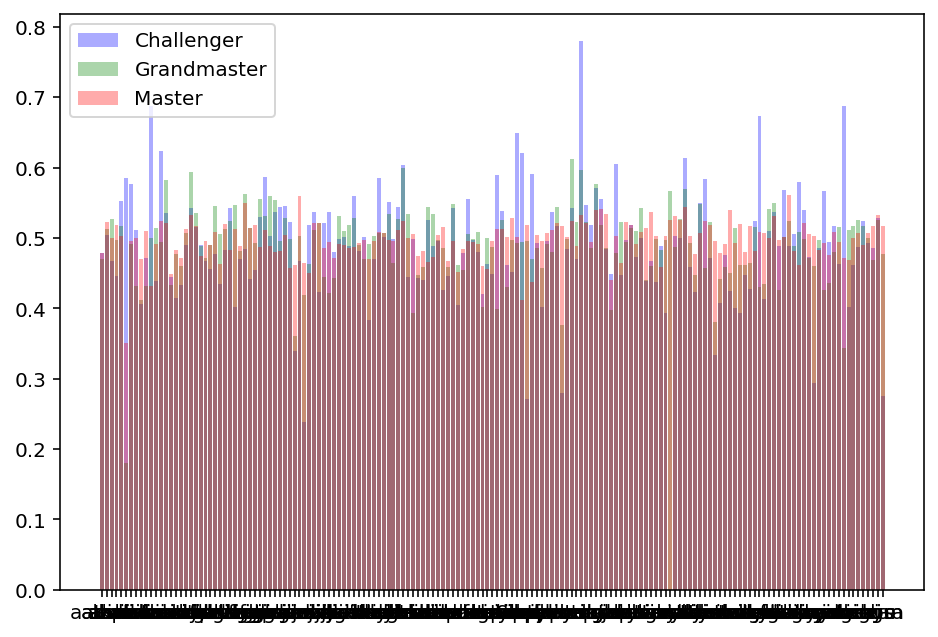

In [132]:
# Show all Champs Winrate by ranks
def show_all_champs():
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.bar(champ_win_rate.index, champ_win_rate["Challenger_WinRate"], color = 'b',alpha=0.33)
    ax.bar(champ_win_rate.index, champ_win_rate["Grandmaster_WinRate"], color = 'g',alpha=0.33)
    ax.bar(champ_win_rate.index, champ_win_rate["Master_WinRate"], color = 'r',alpha=0.33)
    ax.legend(labels=['Challenger', 'Grandmaster','Master'])
    plt.savefig("test.jpg", dpi=1200)
show_all_champs()

In [147]:
champ_win_rate.loc[["aatrox","ahri"]]

,Challenger_WinRate,Grandmaster_WinRate,Master_WinRate
aatrox,0.479079,0.469713,0.478843
ahri,0.503462,0.513208,0.522539


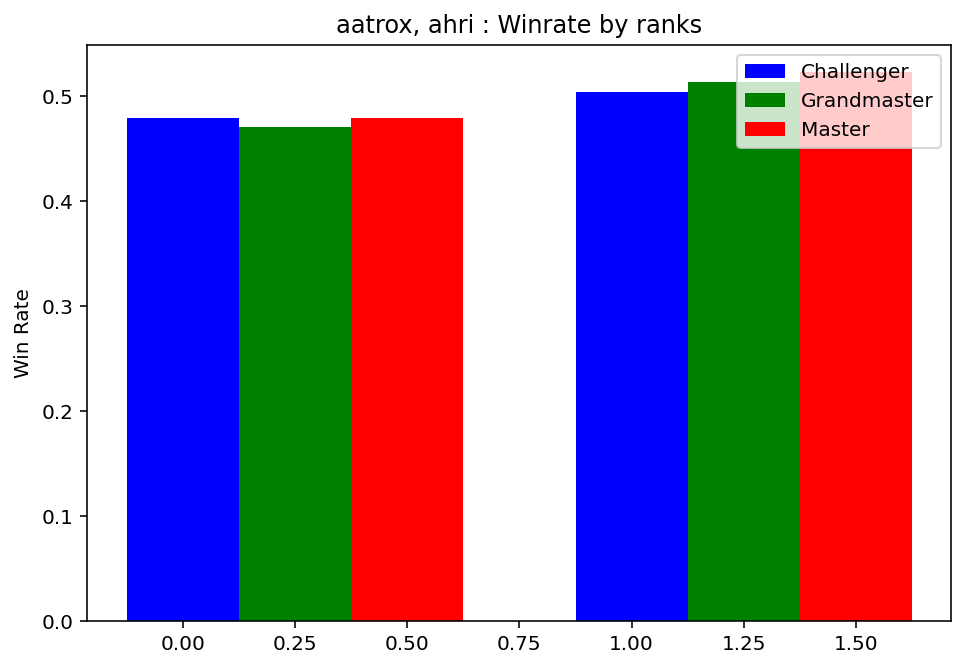

In [157]:
# Show specific champs per ranks
def show_specific_champs(*args):
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    champ_win_rate_tmp = champ_win_rate.loc[list(args)]
    ind = np.arange(len(champ_win_rate_tmp.index))
    ax.bar(ind, champ_win_rate_tmp["Challenger_WinRate"], color = 'b',width=0.25)
    ax.bar(ind+0.25, champ_win_rate_tmp["Grandmaster_WinRate"], color = 'g',width=0.25)
    ax.bar(ind+0.5, champ_win_rate_tmp["Master_WinRate"], color = 'r',width=0.25)
    ax.legend(labels=['Challenger', 'Grandmaster','Master'])
    ax.set_ylabel("Win Rate")
    ax.set_title("{} : Winrate by ranks".format(", ".join(list(args))))
    plt.savefig("test.jpg", dpi=1200)

show_specific_champs("aatrox","ahri")